## RECOGNITION USING PCA AND SVM

In [5]:
import os
import warnings
warnings.simplefilter('ignore')

In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
#%matplotlib inline

In [8]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray 

In [9]:
happy=os.listdir("C:\\Users\\ASUS\\Documents\\RAJAN\\EMOJI\\happy")
sad=os.listdir("C:\\Users\\ASUS\\Documents\\RAJAN\\EMOJI\\sad")
angry=os.listdir("C:\\Users\\ASUS\\Documents\\RAJAN\\EMOJI\\angry")

In [10]:
limit=15
happy_images=[None]*limit
j=0
for i in happy:
    if (j<limit):
        happy_images[j]=imread("C:\\Users\\ASUS\\Documents\\RAJAN\\EMOJI\\happy\\"+i)
        j+=1
    else:
        break

In [11]:
limit=15
sad_images=[None]*limit

j=0
for i in sad:
    if (j<limit):
        sad_images[j]=imread("C:\\Users\\ASUS\\Documents\\RAJAN\\EMOJI\\sad\\"+i)
        j+=1
    else:
        break

In [12]:
limit=15
angry_images=[None]*limit
j=0
for i in angry:
    if (j<limit):
        angry_images[j]=imread("C:\\Users\\ASUS\\Documents\\RAJAN\\EMOJI\\angry\\"+i)
        j+=1
    else:
        break

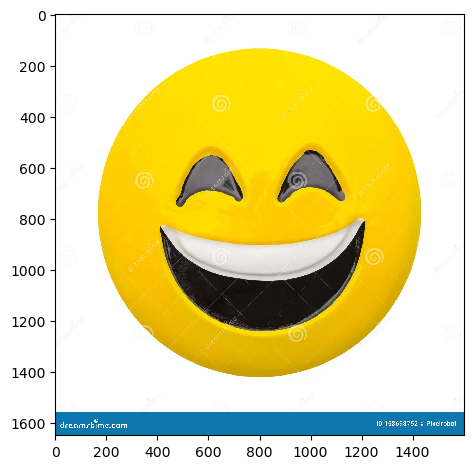

In [13]:
imshow(happy_images[3])

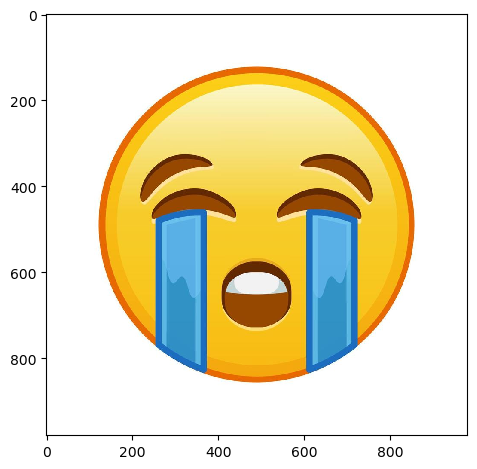

In [14]:
imshow(sad_images[14])

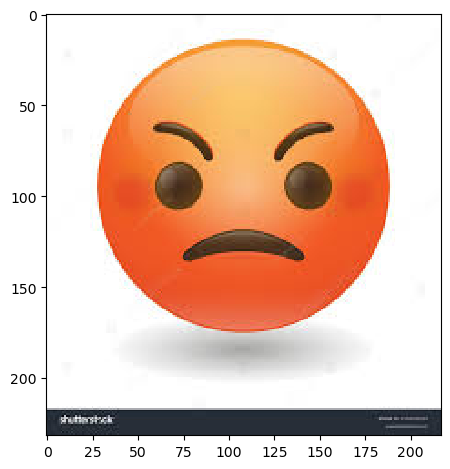

In [15]:
imshow(angry_images[3])


In [16]:
happy_gray = [None] * limit
j = 0

for i in happy:
    if j < limit:
        rgb_image = happy_images[j][..., :3]  
        happy_gray[j] = rgb2gray(rgb_image)
        j += 1
    else:
        break

In [17]:
sad_gray=[None]*limit
j=0
for i in sad:
    if (j<limit):
        rgb_image=sad_images[j][...,:3]
        sad_gray[j]=rgb2gray(rgb_image)
        j+=1
    else:
        break

In [18]:
angry_gray=[None]*limit
j=0
for i in angry:
    if (j<limit):
        rgb_image=angry_images[j][...,:3]
        angry_gray[j]=rgb2gray(rgb_image)
        j+=1
    else:
        break

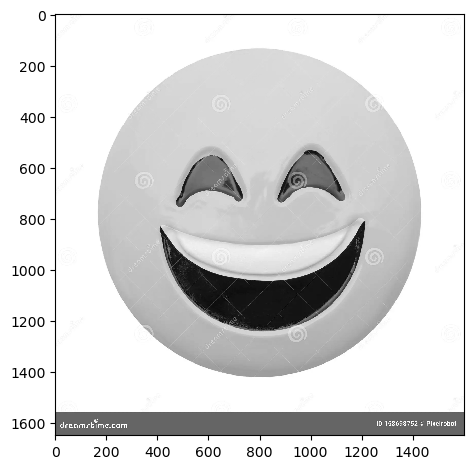

In [19]:
imshow(happy_gray[3])

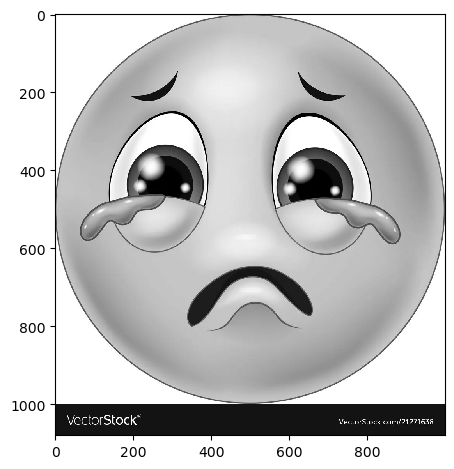

In [20]:
imshow(sad_gray[12])

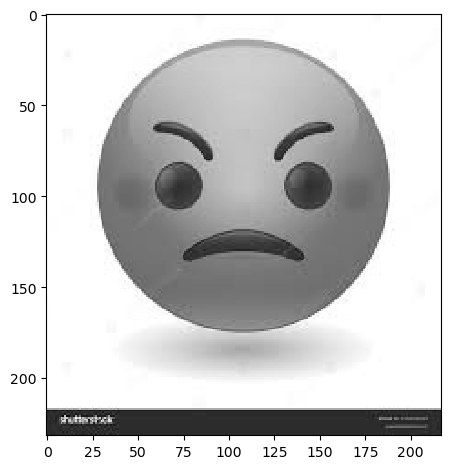

In [21]:
imshow(angry_gray[3])

In [22]:
happy_gray[3].shape

(1649, 1600)

In [23]:
happy_gray[4].shape

(600, 600)

In [24]:
happy_gray[5].shape

(2500, 2500)

In [25]:
sad_gray[3].shape

(826, 860)

In [26]:
sad_gray[4].shape

(800, 800)

In [27]:
sad_gray[5].shape

(944, 1000)

In [28]:
angry_gray[3].shape

(232, 217)

In [29]:
angry_gray[4].shape

(626, 626)

In [30]:
angry_gray[5].shape

(167, 301)

In [31]:
for j in range (15):
    rk=happy_gray[j]
    happy_gray[j]=resize(rk,(512,512))
    

In [32]:
for j in range (15):
    g=sad_gray[j]
    sad_gray[j]=resize(g,(512,512))

In [33]:
for j in range (15):
    k=angry_gray[j]
    angry_gray[j]=resize(k,(512,512))

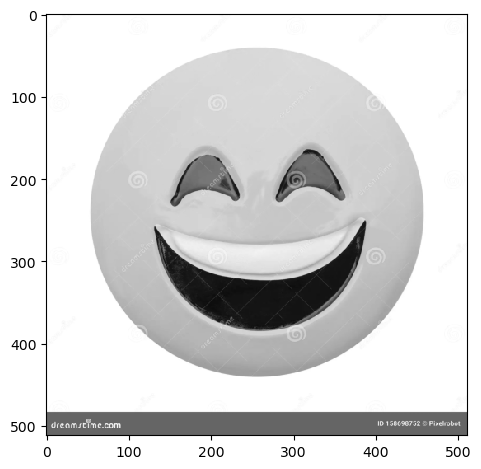

In [34]:
imshow(happy_gray[3])

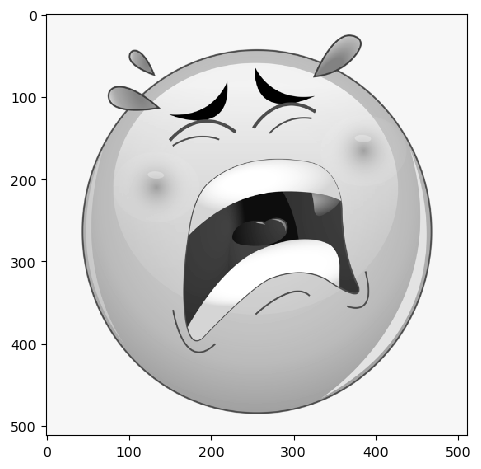

In [35]:
imshow(sad_gray[3])

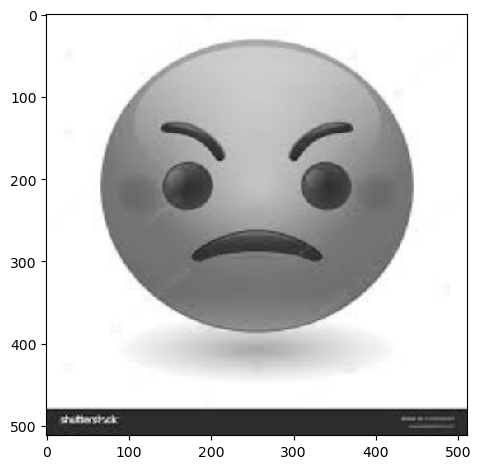

In [36]:
imshow(angry_gray[3])

In [37]:
len_of_images_happy=len(happy_gray)

In [38]:
len_of_images_happy

15

In [39]:
len_of_images_sad=len(sad_gray)

In [40]:
len_of_images_sad

15

In [41]:
len_of_images_angry=len(angry_gray)


In [42]:
len_of_images_angry

15

In [43]:
image_size_happy=happy_gray[3].shape

In [44]:
image_size_happy

(512, 512)

In [45]:
image_size_sad=sad_gray[3].shape

In [46]:
image_size_sad

(512, 512)

In [47]:
image_size_angry=angry_gray[3].shape

In [48]:
image_size_angry

(512, 512)

In [49]:
flatten_size_happy=image_size_happy[0]*image_size_happy[1]

In [50]:
flatten_size_happy

262144

In [51]:
flatten_size_sad=image_size_sad[0]*image_size_sad[1]

In [52]:
flatten_size_sad

262144

In [53]:
flatten_size_angry=image_size_angry[0]*image_size_angry[1]

In [54]:
flatten_size_angry

262144

In [55]:
for i in range(len_of_images_happy):
    happy_gray[i]=np.ndarray.flatten(happy_gray[i]) .reshape(flatten_size_happy,1)

In [56]:
happy_gray=np.dstack(happy_gray)

In [57]:
happy_gray

array([[[1.        , 0.49913075, 0.        , ..., 0.99918347,
         0.99607843, 1.        ]],

       [[1.        , 0.49926028, 0.        , ..., 0.99810203,
         0.99607843, 1.        ]],

       [[1.        , 0.50018451, 0.        , ..., 0.99810203,
         0.99607843, 1.        ]],

       ...,

       [[1.        , 0.50026549, 0.        , ..., 0.99810203,
         0.99607843, 1.        ]],

       [[1.        , 0.50026549, 0.        , ..., 0.99810203,
         0.99607843, 1.        ]],

       [[1.        , 0.50026549, 0.        , ..., 0.99918347,
         0.99607843, 1.        ]]])

In [58]:
for i in range(len_of_images_sad):
    sad_gray[i]=np.ndarray.flatten(sad_gray[i]).reshape(flatten_size_sad,1)

In [59]:
sad_gray=np.dstack(sad_gray)

In [60]:
sad_gray

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        , ..., 0.07484431,
         0.99999987, 1.        ]],

       [[1.        , 1.        , 1.        , ..., 0.07484431,
         1.        , 1.        ]],

       [[1.        , 1.        , 1.        , ..., 0.07484431,
         1.        , 1.        ]]])

In [61]:
for i in range(len_of_images_angry):
    angry_gray[i]=np.ndarray.flatten(angry_gray[i]).reshape(flatten_size_angry,1)

In [62]:
angry_gray=np.dstack(angry_gray)

In [63]:
angry_gray

array([[[1.        , 0.3948702 , 1.        , ..., 1.        ,
         1.        , 0.38986   ]],

       [[1.        , 0.3948702 , 1.        , ..., 1.        ,
         1.        , 0.38986   ]],

       [[1.        , 0.3948702 , 1.        , ..., 1.        ,
         1.        , 0.38986   ]],

       ...,

       [[1.        , 0.3948702 , 0.07484431, ..., 1.        ,
         0.85490196, 0.38986   ]],

       [[1.        , 0.3948702 , 0.07484431, ..., 1.        ,
         0.85490196, 0.38986   ]],

       [[1.        , 0.3948702 , 0.07484431, ..., 1.        ,
         0.85490196, 0.38986   ]]])

In [64]:
happy_gray.shape

(262144, 1, 15)

In [65]:
sad_gray.shape

(262144, 1, 15)

In [66]:
angry_gray.shape

(262144, 1, 15)

In [67]:
happy_gray=np.rollaxis(happy_gray,axis=2,start=0)

In [68]:
happy_gray.shape

(15, 262144, 1)

In [69]:
sad_gray=np.rollaxis(sad_gray,axis=2,start=0)

In [70]:
sad_gray.shape

(15, 262144, 1)

In [71]:
angry_gray=np.rollaxis(angry_gray,axis=2,start=0)

In [72]:
angry_gray.shape

(15, 262144, 1)

In [73]:
happy_gray=happy_gray.reshape(len_of_images_happy,flatten_size_happy)

In [74]:
happy_gray.shape

(15, 262144)

In [75]:
sad_gray=sad_gray.reshape(len_of_images_sad,flatten_size_sad)

In [76]:
sad_gray.shape

(15, 262144)

In [77]:
angry_gray=angry_gray.reshape(len_of_images_angry,flatten_size_angry)

In [78]:
angry_gray.shape

(15, 262144)

In [79]:
happy_data=pd.DataFrame(happy_gray)

In [80]:
happy_data

0         1         2             3         4         5         6       \
0   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
1   0.499131  0.499260  0.500185  4.996175e-01  0.499536  0.500154  0.500265   
2   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
3   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
4   0.229597  0.200749  0.197881  2.138166e-01  0.220419  0.225015  0.225229   
5   0.000014  0.000676  0.000118  1.151059e-07  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
7   0.999612  0.998817  0.998817  9.988166e-01  0.998817  0.998817  0.998817   
8   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
9   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
10  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
11  0.924779  0.958774  0.963016  9.661673e-01  0.966279  0.966332  0.966332   
12  0.999183  0.998102  0.998102  9.981020e-01  0.998102  0.998102  0.998102   
13  0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078  0.996078   
14  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   

      7         8         9       ...    262134    262135    262136    262137  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.500265  0.500265  0.500265  ...  0.500265  0.500265  0.500265  0.500265   
2   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3   1.000000  1.000000  1.000000  ...  0.395834  0.395834  0.395834  0.395834   
4   0.225229  0.228330  0.231956  ...  0.508551  0.504908  0.506835  0.507405   
5   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
7   0.998817  0.998817  0.998817  ...  0.932150  0.932150  0.932150  0.932150   
8   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
9   1.000000  1.000000  1.000000  ...  0.905882  0.909314  0.992647  0.997549   
10  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
11  0.966332  0.966332  0.966332  ...  0.196078  0.196078  0.196078  0.196078   
12  0.998102  0.998102  0.998102  ...  0.998102  0.998102  0.998102  0.998102   
13  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
14  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   

      262138    262139    262140    262141    262142    262143  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   0.500265  0.500265  0.500265  0.500265  0.500265  0.500265  
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3   0.395834  0.395834  0.395834  0.395834  0.395834  0.395834  
4   0.507298  0.505433  0.507221  0.509920  0.509920  0.509920  
5   0.000000  0.000001  0.001604  0.092288  0.597978  0.958585  
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
7   0.932150  0.932150  0.932150  0.932150  0.932150  0.932945  
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
9   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
11  0.196078  0.196078  0.196078  0.196078  0.196078  0.196078  
12  0.998102  0.998102  0.998102  0.998102  0.998102  0.999183  
13  0.996078  0.996078  0.996078  0.996078  0.996078  0.996078  
14  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  

[15 rows x 262144 columns]

In [81]:
sad_data=pd.DataFrame(sad_gray)

In [82]:
sad_data

0         1         2         3         4         5         6       \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3   0.968627  0.968627  0.968627  0.968627  0.968627  0.968627  0.968627   
4   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
6   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
8   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
11  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
14  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

      7         8         9       ...    262134    262135    262136    262137  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
2   1.000000  1.000000  1.000000  ...  0.994569  0.997836  0.999703  0.999987   
3   0.968627  0.968627  0.968627  ...  0.968627  0.968627  0.968627  0.968627   
4   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
5   1.000000  1.000000  1.000000  ...  0.074844  0.074844  0.074844  0.074844   
6   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
7   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
8   1.000000  1.000000  1.000000  ...  1.000000  0.985674  0.869931  0.870433   
9   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
10  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
11  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  ...  0.074844  0.074844  0.074844  0.074844   
13  1.000000  1.000000  1.000000  ...  0.866667  0.866667  0.866667  0.866794   
14  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   

      262138    262139    262140    262141    262142    262143  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
2   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
3   0.968627  0.968627  0.968627  0.968627  0.968627  0.968627  
4   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
5   0.074844  0.074844  0.074844  0.074844  0.074844  0.074844  
6   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
7   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
8   0.866726  0.866667  0.866667  0.866667  0.866667  0.866667  
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
10  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
11  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
12  0.074844  0.074844  0.074844  0.074844  0.074844  0.074844  
13  0.871399  0.867260  0.964056  1.000000  1.000000  1.000000  
14  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  

[15 rows x 262144 columns]

In [83]:
angry_data=pd.DataFrame(angry_gray)

In [84]:
angry_data

0         1         2             3         4         5         6       \
0   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
1   0.394870  0.394870  0.394870  3.948702e-01  0.394870  0.394870  0.394870   
2   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
3   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
4   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
5   0.997031  0.994499  0.986029  9.936265e-01  0.999616  0.998062  0.996522   
6   0.972549  0.972549  0.972549  9.725490e-01  0.972549  0.972549  0.972549   
7   0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078  0.996078   
8   0.000014  0.000663  0.000116  1.129038e-07  0.000000  0.000000  0.000000   
9   0.999832  0.999487  0.999487  9.994868e-01  0.999487  0.999487  0.999487   
10  0.901961  0.901961  0.901961  9.019608e-01  0.901961  0.901961  0.901961   
11  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
14  0.389860  0.389860  0.389860  3.898600e-01  0.389860  0.389860  0.389860   

      7         8         9       ...    262134    262135    262136    262137  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.394870  0.394870  0.394870  ...  0.394870  0.394870  0.394870  0.394870   
2   1.000000  1.000000  1.000000  ...  0.074844  0.074844  0.074844  0.074844   
3   1.000000  1.000000  1.000000  ...  0.179892  0.182463  0.181028  0.178314   
4   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
5   0.994993  0.940855  0.887649  ...  0.959774  0.951292  0.942749  0.946559   
6   0.972549  0.972549  0.972549  ...  0.972549  0.972549  0.972549  0.972549   
7   0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
8   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
9   0.999487  0.999487  0.999487  ...  0.932820  0.932820  0.932820  0.932820   
10  0.901961  0.901961  0.901961  ...  0.901961  0.901961  0.901961  0.901961   
11  1.000000  0.926290  0.901961  ...  1.000000  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  ...  0.854902  0.854902  0.854902  0.854902   
14  0.389860  0.389860  0.389860  ...  0.389860  0.389860  0.389860  0.389860   

      262138    262139    262140    262141    262142    262143  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   0.394870  0.394870  0.394870  0.394870  0.394870  0.394870  
2   0.074844  0.074844  0.074844  0.074844  0.074844  0.074844  
3   0.174937  0.170561  0.166540  0.171215  0.175889  0.174209  
4   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
5   0.949367  0.950970  0.949178  0.946387  0.945759  0.945571  
6   0.972549  0.972549  0.972549  0.972549  0.972549  0.972549  
7   0.996078  0.996078  0.996078  0.996078  0.996078  0.996078  
8   0.000000  0.000001  0.001546  0.088278  0.600577  0.930307  
9   0.932820  0.932820  0.932820  0.932820  0.932845  0.935622  
10  0.901961  0.901961  0.901961  0.901961  0.901961  0.901961  
11  1.000000  1.000000  0.999183  0.905802  0.901961  0.901961  
12  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
13  0.854902  0.854902  0.854902  0.854902  0.854902  0.854902  
14  0.389860  0.389860  0.389860  0.389860  0.389860  0.389860  

[15 rows x 262144 columns]

In [85]:
happy_data["label"]="happy"

In [86]:
happy_data

0         1         2             3         4         5         6  \
0   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
1   0.499131  0.499260  0.500185  4.996175e-01  0.499536  0.500154  0.500265   
2   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
3   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
4   0.229597  0.200749  0.197881  2.138166e-01  0.220419  0.225015  0.225229   
5   0.000014  0.000676  0.000118  1.151059e-07  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
7   0.999612  0.998817  0.998817  9.988166e-01  0.998817  0.998817  0.998817   
8   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
9   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
10  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
11  0.924779  0.958774  0.963016  9.661673e-01  0.966279  0.966332  0.966332   
12  0.999183  0.998102  0.998102  9.981020e-01  0.998102  0.998102  0.998102   
13  0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078  0.996078   
14  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   

           7         8         9  ...    262135    262136    262137    262138  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.500265  0.500265  0.500265  ...  0.500265  0.500265  0.500265  0.500265   
2   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3   1.000000  1.000000  1.000000  ...  0.395834  0.395834  0.395834  0.395834   
4   0.225229  0.228330  0.231956  ...  0.504908  0.506835  0.507405  0.507298   
5   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
7   0.998817  0.998817  0.998817  ...  0.932150  0.932150  0.932150  0.932150   
8   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
9   1.000000  1.000000  1.000000  ...  0.909314  0.992647  0.997549  1.000000   
10  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
11  0.966332  0.966332  0.966332  ...  0.196078  0.196078  0.196078  0.196078   
12  0.998102  0.998102  0.998102  ...  0.998102  0.998102  0.998102  0.998102   
13  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
14  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   

      262139    262140    262141    262142    262143  label  
0   1.000000  1.000000  1.000000  1.000000  1.000000  happy  
1   0.500265  0.500265  0.500265  0.500265  0.500265  happy  
2   0.000000  0.000000  0.000000  0.000000  0.000000  happy  
3   0.395834  0.395834  0.395834  0.395834  0.395834  happy  
4   0.505433  0.507221  0.509920  0.509920  0.509920  happy  
5   0.000001  0.001604  0.092288  0.597978  0.958585  happy  
6   0.000000  0.000000  0.000000  0.000000  0.000000  happy  
7   0.932150  0.932150  0.932150  0.932150  0.932945  happy  
8   0.000000  0.000000  0.000000  0.000000  0.000000  happy  
9   1.000000  1.000000  1.000000  1.000000  1.000000  happy  
10  0.000000  0.000000  0.000000  0.000000  0.000000  happy  
11  0.196078  0.196078  0.196078  0.196078  0.196078  happy  
12  0.998102  0.998102  0.998102  0.998102  0.999183  happy  
13  0.996078  0.996078  0.996078  0.996078  0.996078  happy  
14  1.000000  1.000000  1.000000  1.000000  1.000000  happy  

[15 rows x 262145 columns]

In [87]:
sad_data["label"]="sad"

In [88]:
sad_data

0         1         2         3         4         5         6  \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3   0.968627  0.968627  0.968627  0.968627  0.968627  0.968627  0.968627   
4   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
5   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
6   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
8   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
11  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
14  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

           7         8         9  ...    262135    262136    262137    262138  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
2   1.000000  1.000000  1.000000  ...  0.997836  0.999703  0.999987  1.000000   
3   0.968627  0.968627  0.968627  ...  0.968627  0.968627  0.968627  0.968627   
4   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
5   1.000000  1.000000  1.000000  ...  0.074844  0.074844  0.074844  0.074844   
6   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
7   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
8   1.000000  1.000000  1.000000  ...  0.985674  0.869931  0.870433  0.866726   
9   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
10  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
11  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  ...  0.074844  0.074844  0.074844  0.074844   
13  1.000000  1.000000  1.000000  ...  0.866667  0.866667  0.866794  0.871399   
14  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   

      262139    262140    262141    262142    262143  label  
0   1.000000  1.000000  1.000000  1.000000  1.000000    sad  
1   1.000000  1.000000  1.000000  1.000000  1.000000    sad  
2   1.000000  1.000000  1.000000  1.000000  1.000000    sad  
3   0.968627  0.968627  0.968627  0.968627  0.968627    sad  
4   1.000000  1.000000  1.000000  1.000000  1.000000    sad  
5   0.074844  0.074844  0.074844  0.074844  0.074844    sad  
6   1.000000  1.000000  1.000000  1.000000  1.000000    sad  
7   1.000000  1.000000  1.000000  1.000000  1.000000    sad  
8   0.866667  0.866667  0.866667  0.866667  0.866667    sad  
9   0.000000  0.000000  0.000000  0.000000  0.000000    sad  
10  1.000000  1.000000  1.000000  1.000000  1.000000    sad  
11  1.000000  1.000000  1.000000  1.000000  1.000000    sad  
12  0.074844  0.074844  0.074844  0.074844  0.074844    sad  
13  0.867260  0.964056  1.000000  1.000000  1.000000    sad  
14  1.000000  1.000000  1.000000  1.000000  1.000000    sad  

[15 rows x 262145 columns]

In [89]:
angry_data["label"]="angry"

In [90]:
angry_data

0         1         2             3         4         5         6  \
0   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
1   0.394870  0.394870  0.394870  3.948702e-01  0.394870  0.394870  0.394870   
2   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
3   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
4   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
5   0.997031  0.994499  0.986029  9.936265e-01  0.999616  0.998062  0.996522   
6   0.972549  0.972549  0.972549  9.725490e-01  0.972549  0.972549  0.972549   
7   0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078  0.996078   
8   0.000014  0.000663  0.000116  1.129038e-07  0.000000  0.000000  0.000000   
9   0.999832  0.999487  0.999487  9.994868e-01  0.999487  0.999487  0.999487   
10  0.901961  0.901961  0.901961  9.019608e-01  0.901961  0.901961  0.901961   
11  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
14  0.389860  0.389860  0.389860  3.898600e-01  0.389860  0.389860  0.389860   

           7         8         9  ...    262135    262136    262137    262138  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.394870  0.394870  0.394870  ...  0.394870  0.394870  0.394870  0.394870   
2   1.000000  1.000000  1.000000  ...  0.074844  0.074844  0.074844  0.074844   
3   1.000000  1.000000  1.000000  ...  0.182463  0.181028  0.178314  0.174937   
4   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
5   0.994993  0.940855  0.887649  ...  0.951292  0.942749  0.946559  0.949367   
6   0.972549  0.972549  0.972549  ...  0.972549  0.972549  0.972549  0.972549   
7   0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
8   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
9   0.999487  0.999487  0.999487  ...  0.932820  0.932820  0.932820  0.932820   
10  0.901961  0.901961  0.901961  ...  0.901961  0.901961  0.901961  0.901961   
11  1.000000  0.926290  0.901961  ...  1.000000  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  ...  0.854902  0.854902  0.854902  0.854902   
14  0.389860  0.389860  0.389860  ...  0.389860  0.389860  0.389860  0.389860   

      262139    262140    262141    262142    262143  label  
0   1.000000  1.000000  1.000000  1.000000  1.000000  angry  
1   0.394870  0.394870  0.394870  0.394870  0.394870  angry  
2   0.074844  0.074844  0.074844  0.074844  0.074844  angry  
3   0.170561  0.166540  0.171215  0.175889  0.174209  angry  
4   1.000000  1.000000  1.000000  1.000000  1.000000  angry  
5   0.950970  0.949178  0.946387  0.945759  0.945571  angry  
6   0.972549  0.972549  0.972549  0.972549  0.972549  angry  
7   0.996078  0.996078  0.996078  0.996078  0.996078  angry  
8   0.000001  0.001546  0.088278  0.600577  0.930307  angry  
9   0.932820  0.932820  0.932820  0.932845  0.935622  angry  
10  0.901961  0.901961  0.901961  0.901961  0.901961  angry  
11  1.000000  0.999183  0.905802  0.901961  0.901961  angry  
12  1.000000  1.000000  1.000000  1.000000  1.000000  angry  
13  0.854902  0.854902  0.854902  0.854902  0.854902  angry  
14  0.389860  0.389860  0.389860  0.389860  0.389860  angry  

[15 rows x 262145 columns]

In [91]:
EMOJI_1=pd.concat([happy_data,sad_data])

In [92]:
EMOJI=pd.concat([EMOJI_1,angry_data])

In [93]:
EMOJI

0         1         2             3         4         5         6  \
0   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
1   0.499131  0.499260  0.500185  4.996175e-01  0.499536  0.500154  0.500265   
2   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
3   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
4   0.229597  0.200749  0.197881  2.138166e-01  0.220419  0.225015  0.225229   
5   0.000014  0.000676  0.000118  1.151059e-07  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
7   0.999612  0.998817  0.998817  9.988166e-01  0.998817  0.998817  0.998817   
8   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
9   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
10  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
11  0.924779  0.958774  0.963016  9.661673e-01  0.966279  0.966332  0.966332   
12  0.999183  0.998102  0.998102  9.981020e-01  0.998102  0.998102  0.998102   
13  0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078  0.996078   
14  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
0   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
2   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
3   0.968627  0.968627  0.968627  9.686275e-01  0.968627  0.968627  0.968627   
4   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
5   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
6   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
7   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
8   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
9   0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
10  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
11  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
14  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
0   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
1   0.394870  0.394870  0.394870  3.948702e-01  0.394870  0.394870  0.394870   
2   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
3   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
4   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
5   0.997031  0.994499  0.986029  9.936265e-01  0.999616  0.998062  0.996522   
6   0.972549  0.972549  0.972549  9.725490e-01  0.972549  0.972549  0.972549   
7   0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078  0.996078   
8   0.000014  0.000663  0.000116  1.129038e-07  0.000000  0.000000  0.000000   
9   0.999832  0.999487  0.999487  9.994868e-01  0.999487  0.999487  0.999487   
10  0.901961  0.901961  0.901961  9.019608e-01  0.901961  0.901961  0.901961   
11  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
12  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
14  0.389860  0.389860  0.389860  3.898600e-01  0.389860  0.389860  0.389860   

           7         8         9  ...    262135    262136    262137    262138  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.500265  0.500265  0.500265  ...  0.500265  0.500265  0.500265  0.500265   
2   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3   1.

In [94]:
from sklearn.utils import shuffle

In [95]:
emoji_indexed=shuffle(EMOJI).reset_index()

In [96]:
emoji_indexed

index         0         1         2             3         4         5  \
0       1  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
1      12  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
2      13  0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078   
3       7  0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078   
4      14  0.389860  0.389860  0.389860  3.898600e-01  0.389860  0.389860   
5      14  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
6       3  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
7      11  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
8       2  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
9       8  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
10      8  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000   
11      7  0.999612  0.998817  0.998817  9.988166e-01  0.998817  0.998817   
12     11  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
13     13  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
14      5  0.997031  0.994499  0.986029  9.936265e-01  0.999616  0.998062   
15      6  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
16     10  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000   
17      9  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
18      9  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000   
19      4  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
20      0  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
21     10  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
22      8  0.000014  0.000663  0.000116  1.129038e-07  0.000000  0.000000   
23     14  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
24      9  0.999832  0.999487  0.999487  9.994868e-01  0.999487  0.999487   
25      2  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000   
26      2  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
27      0  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
28     13  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
29      1  0.499131  0.499260  0.500185  4.996175e-01  0.499536  0.500154   
30      5  0.000014  0.000676  0.000118  1.151059e-07  0.000000  0.000000   
31      5  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
32      0  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
33      4  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
34      3  0.968627  0.968627  0.968627  9.686275e-01  0.968627  0.968627   
35      3  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
36      4  0.229597  0.200749  0.197881  2.138166e-01  0.220419  0.225015   
37     12  0.999183  0.998102  0.998102  9.981020e-01  0.998102  0.998102   
38      7  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   
39      1  0.394870  0.394870  0.394870  3.948702e-01  0.394870  0.394870   
40     10  0.901961  0.901961  0.901961  9.019608e-01  0.901961  0.901961   
41      6  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000   
42      6  0.972549  0.972549  0.972549  9.725490e-01  0.972549  0.972549   
43     11  0.924779  0.958774  0.963016  9.661673e-01  0.966279  0.966332   
44     12  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000   

           6         7         8  ...    262135    262136    262137    262138  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
2   0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
3   0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
4   0.389860  0.389860  0.389860  ...  0.389860  0.38986

In [97]:
emoji_classifier=emoji_indexed.drop(["index"],axis=1)

In [98]:
emoji_classifier

0         1         2             3         4         5         6  \
0   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
2   0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078  0.996078   
3   0.996078  0.996078  0.996078  9.960784e-01  0.996078  0.996078  0.996078   
4   0.389860  0.389860  0.389860  3.898600e-01  0.389860  0.389860  0.389860   
5   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
6   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
7   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
8   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
9   1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
10  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
11  0.999612  0.998817  0.998817  9.988166e-01  0.998817  0.998817  0.998817   
12  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
13  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
14  0.997031  0.994499  0.986029  9.936265e-01  0.999616  0.998062  0.996522   
15  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
16  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
17  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
18  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
19  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
20  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
21  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
22  0.000014  0.000663  0.000116  1.129038e-07  0.000000  0.000000  0.000000   
23  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
24  0.999832  0.999487  0.999487  9.994868e-01  0.999487  0.999487  0.999487   
25  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
26  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
27  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
28  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
29  0.499131  0.499260  0.500185  4.996175e-01  0.499536  0.500154  0.500265   
30  0.000014  0.000676  0.000118  1.151059e-07  0.000000  0.000000  0.000000   
31  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
32  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
33  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
34  0.968627  0.968627  0.968627  9.686275e-01  0.968627  0.968627  0.968627   
35  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
36  0.229597  0.200749  0.197881  2.138166e-01  0.220419  0.225015  0.225229   
37  0.999183  0.998102  0.998102  9.981020e-01  0.998102  0.998102  0.998102   
38  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   
39  0.394870  0.394870  0.394870  3.948702e-01  0.394870  0.394870  0.394870   
40  0.901961  0.901961  0.901961  9.019608e-01  0.901961  0.901961  0.901961   
41  0.000000  0.000000  0.000000  0.000000e+00  0.000000  0.000000  0.000000   
42  0.972549  0.972549  0.972549  9.725490e-01  0.972549  0.972549  0.972549   
43  0.924779  0.958774  0.963016  9.661673e-01  0.966279  0.966332  0.966332   
44  1.000000  1.000000  1.000000  1.000000e+00  1.000000  1.000000  1.000000   

           7         8         9  ...    262135    262136    262137    262138  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
2   0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
3   0.

In [99]:
x=emoji_classifier.values[:,:-1]

In [100]:
x

array([[1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [0.9960784313725488, 0.9960784313725488, 0.9960784313725488, ...,
        0.9960784313725489, 0.9960784313725488, 0.9960784313725488],
       ...,
       [0.9725490196078431, 0.972549019607843, 0.972549019607843, ...,
        0.972549019607843, 0.9725490196078431, 0.972549019607843],
       [0.9247786401716283, 0.9587742564848764, 0.9630163154933674, ...,
        0.196078431372549, 0.19607843137254896, 0.196078431372549],
       [1.0, 1.0, 1.0, ..., 0.0748443137254902, 0.0748443137254902,
        0.0748443137254902]], dtype=object)

In [101]:
y=emoji_classifier.values[:,-1]

In [102]:
y

array(['sad', 'angry', 'happy', 'angry', 'angry', 'happy', 'angry', 'sad',
       'sad', 'sad', 'happy', 'happy', 'angry', 'sad', 'angry', 'sad',
       'happy', 'happy', 'sad', 'angry', 'happy', 'sad', 'angry', 'sad',
       'angry', 'happy', 'angry', 'sad', 'angry', 'happy', 'happy', 'sad',
       'angry', 'sad', 'sad', 'happy', 'happy', 'happy', 'sad', 'angry',
       'angry', 'happy', 'angry', 'happy', 'sad'], dtype=object)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [105]:
x_train.shape

(36, 262144)

In [106]:
x_train

array([[1.0, 1.0, 1.0, ..., 0.07484431372549022, 0.07484431372549022,
        0.07484431372549022],
       [0.4991307503346015, 0.4992602827016891, 0.5001845080332931, ...,
        0.5002654901960784, 0.5002654901960784, 0.5002654901960784],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       ...,
       [0.996078431372549, 0.996078431372549, 0.996078431372549, ...,
        0.996078431372549, 0.996078431372549, 0.996078431372549],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [1.0, 1.0, 1.0, ..., 0.0748443137254902, 0.0748443137254902,
        0.0748443137254902]], dtype=object)

In [107]:
x_test.shape

(9, 262144)

In [108]:
from sklearn import decomposition

In [109]:
pca=decomposition.PCA(n_components=24,whiten=True,random_state=1)

In [110]:
pca.fit(x_train)

PCA(n_components=24, random_state=1, whiten=True)

In [111]:
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

In [112]:
x_train_pca.shape

(36, 24)

In [113]:
x_test_pca.shape

(9, 24)

In [114]:
eigen=(np.reshape(x[15],(512,512)).astype(np.float64))

In [115]:
eigen

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

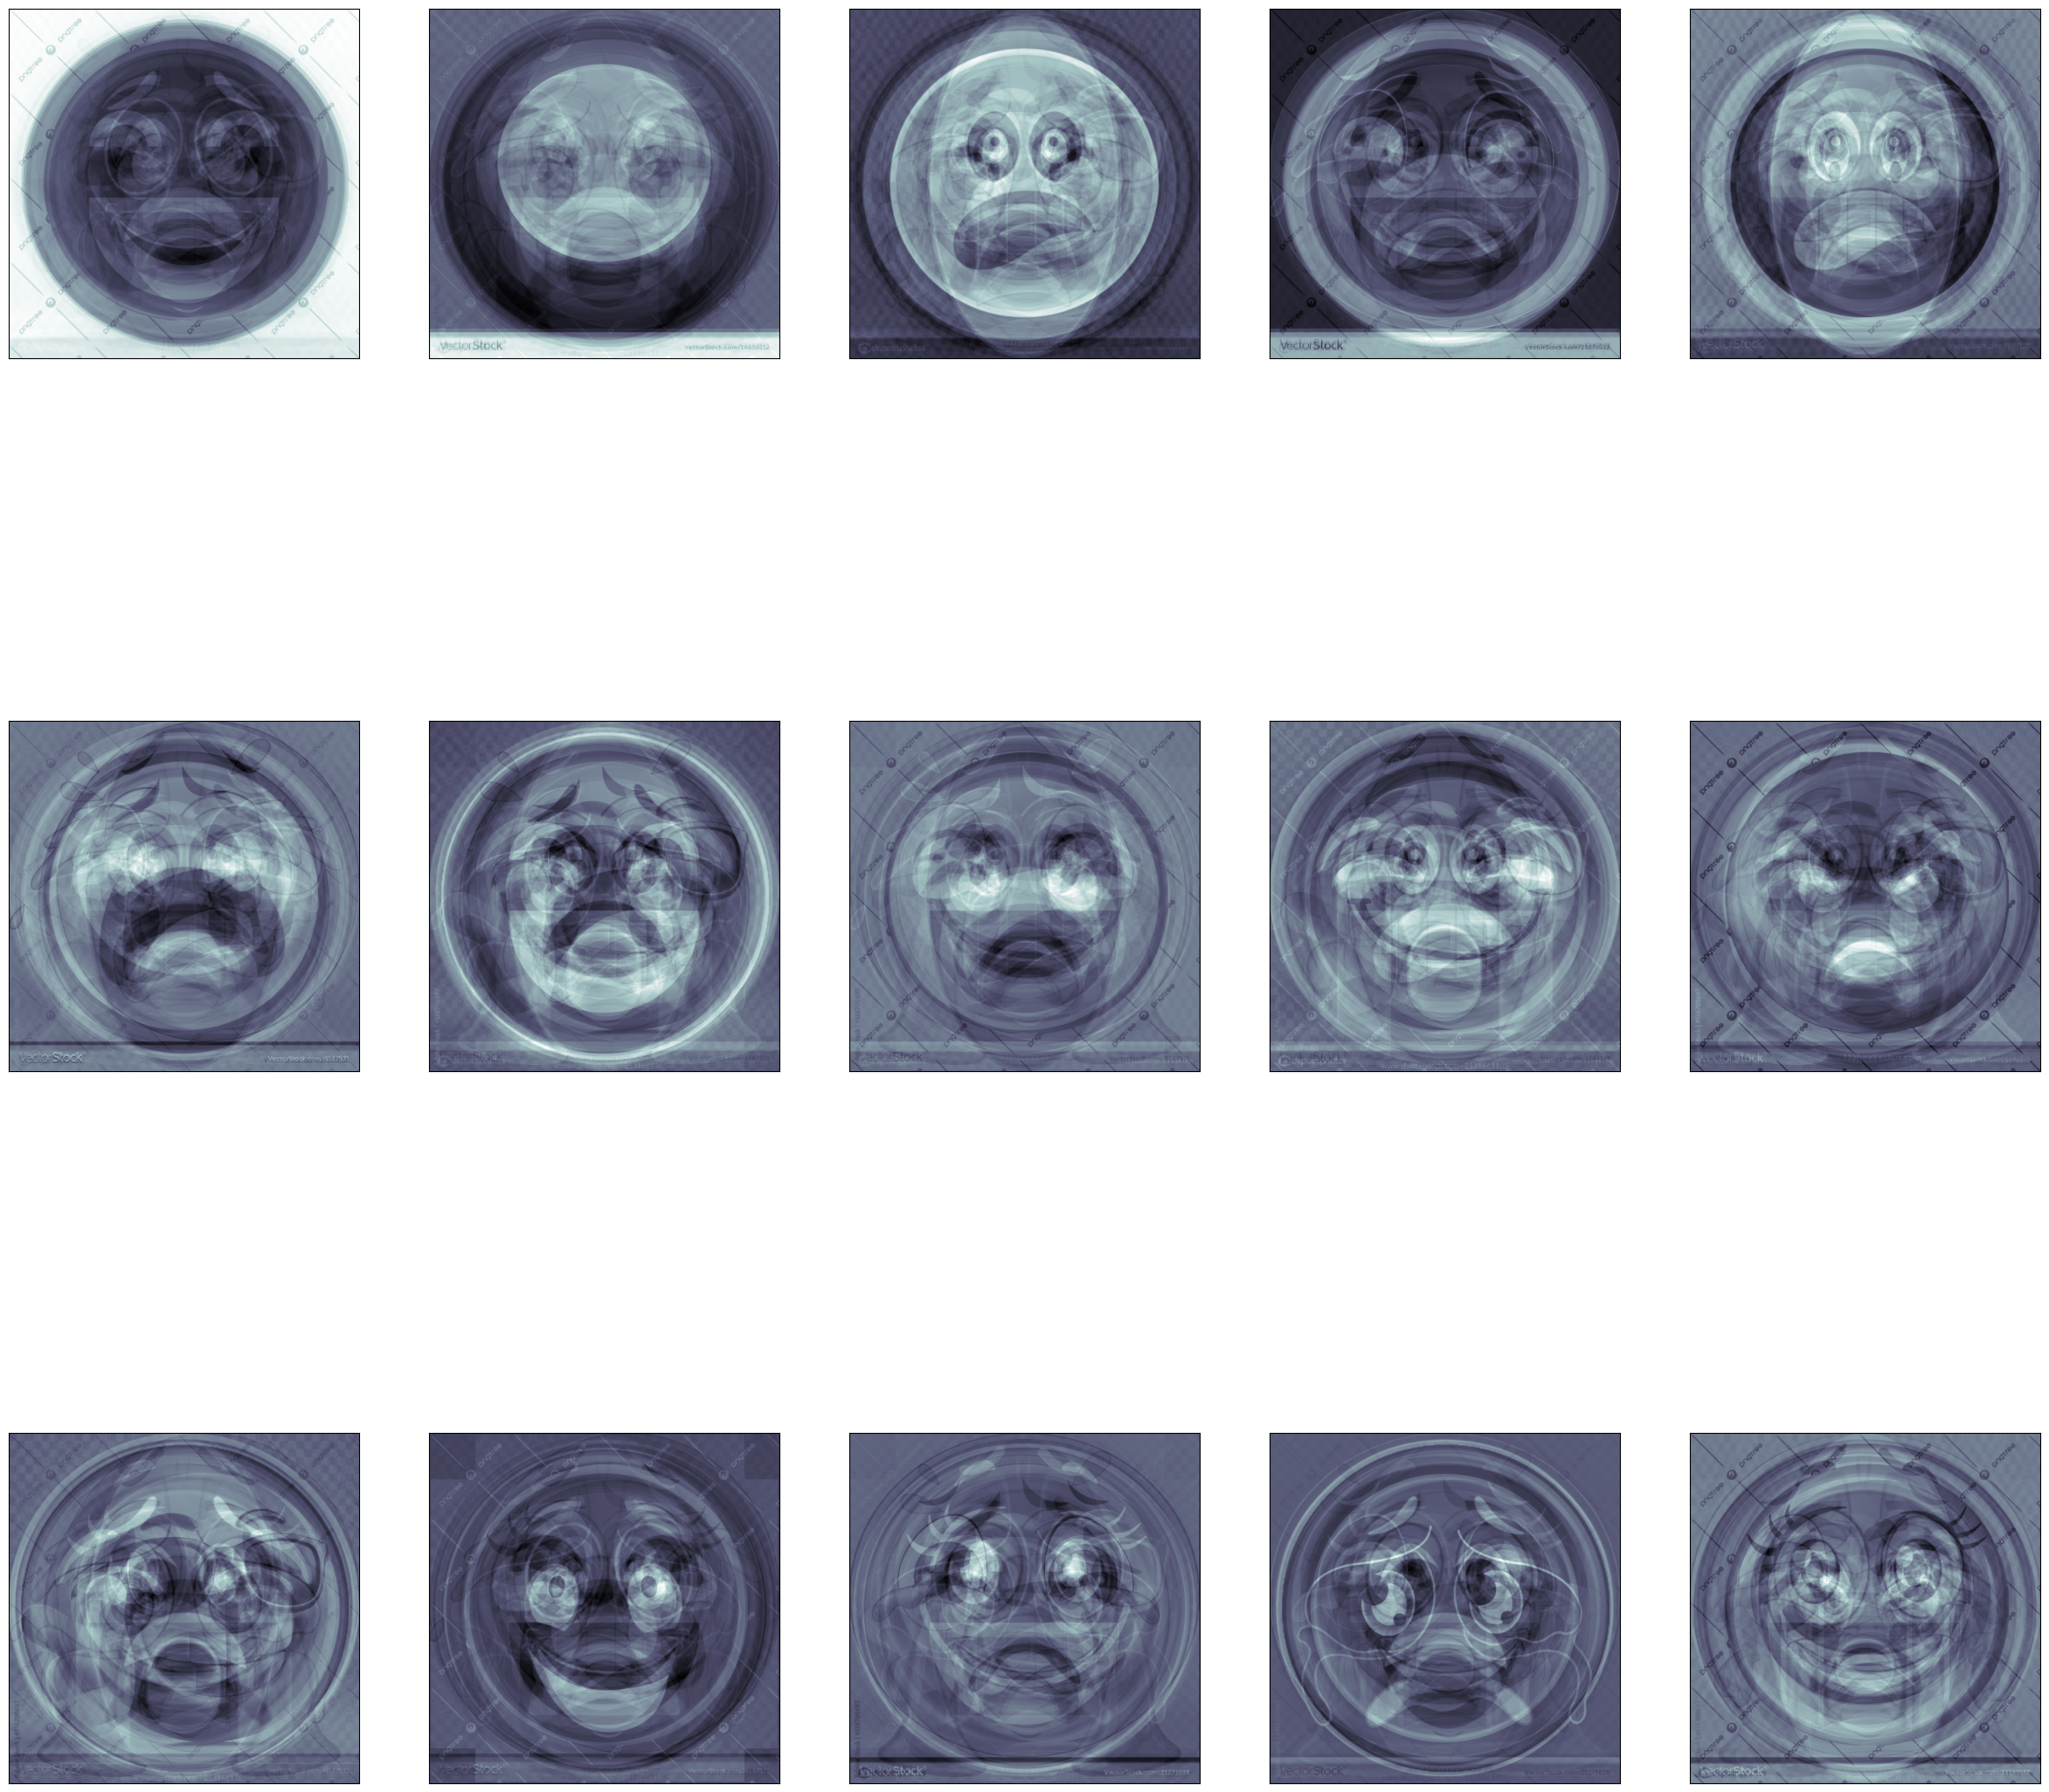

In [116]:
fig=plt.figure(figsize=(30,30))
for i in range(15):
    ax=fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape),cmap=plt.cm.bone)

In [117]:
from sklearn import svm

In [118]:
clf=svm.SVC(C=2,gamma=0.006,kernel='rbf')
clf.fit(x_train_pca,y_train)

SVC(C=2, gamma=0.006)

In [119]:
y_pred =clf.predict(x_test_pca)

In [120]:
y_pred

array(['angry', 'angry', 'angry', 'angry', 'sad', 'angry', 'angry',
       'angry', 'sad'], dtype=object)

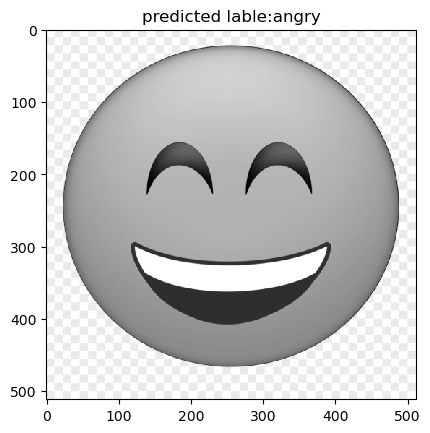

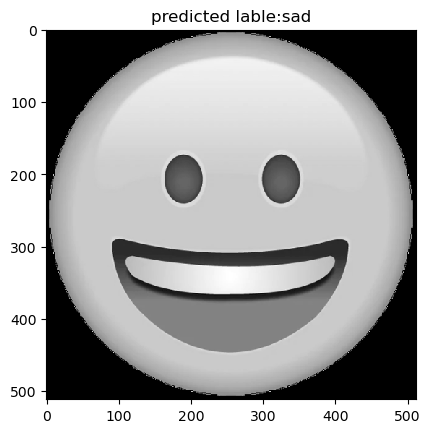

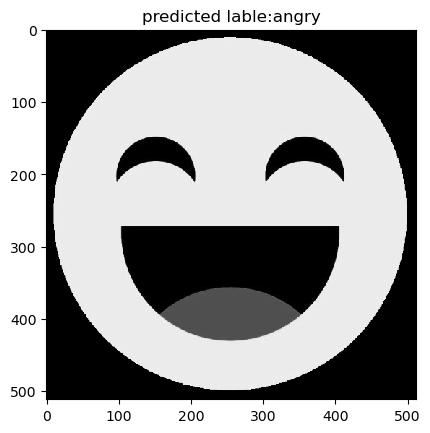

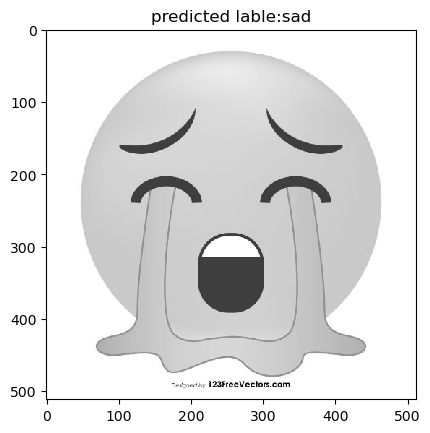

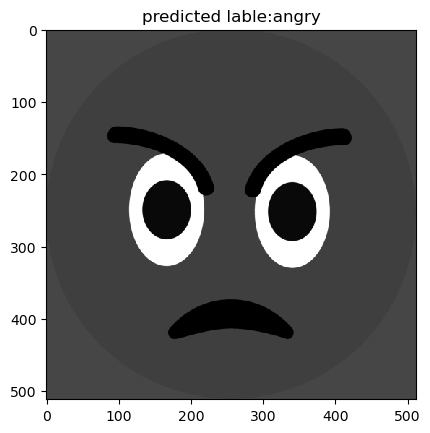

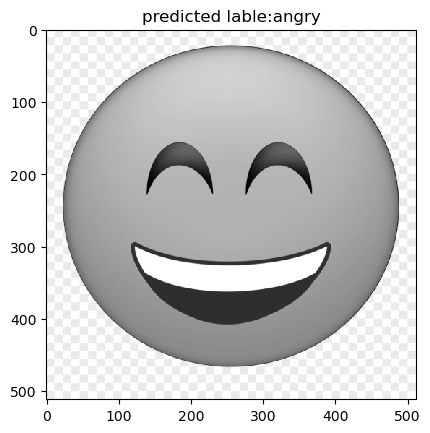

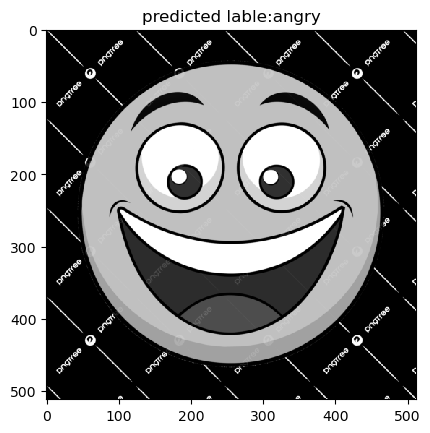

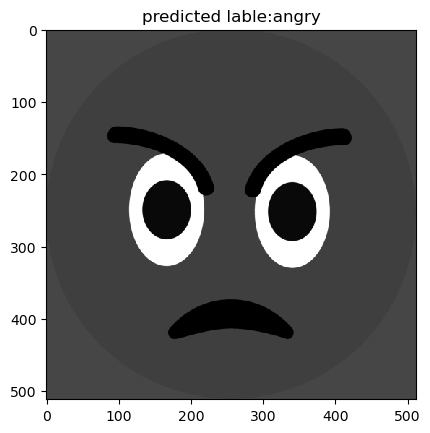

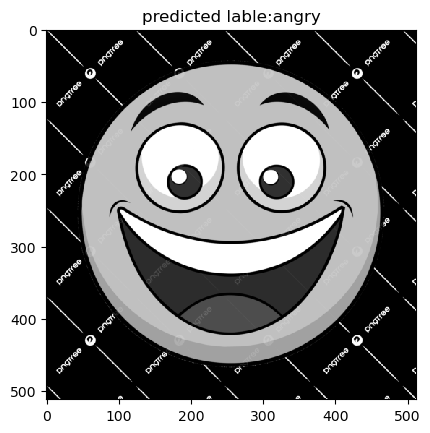

In [121]:
for i in (np.random.randint(0,9,9)):
    predicted_images=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicted lable:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()
    

In [122]:
from sklearn import metrics

In [123]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [124]:
accuracy

0.3333333333333333

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(y_test,y_pred)

array([[2, 0, 0],
       [4, 0, 1],
       [1, 0, 1]])